---
# Reviewer comments

In [2]:
from linescanning import (
    utils,
    prf,
    plotting,
    optimal
)
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np
import os
from pRFline.utils import SubjectsDict
from pRFline import figures
import seaborn as sns
opj = os.path.join

# Set defaults

In [3]:
# set defaults
task        = "task-pRF"
base_dir    = "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF"
prog_dir    = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline"
# design_dir  = opj(prog_dir, "data_lp3")
design_dir  = opj(base_dir, "derivatives", "prf")
fig_dir     = opj(prog_dir, "figures")
data_dir    = opj(prog_dir, "data")
results_dir = opj(prog_dir, "results")

In [4]:
# fetch subject dictionary from pRFline.utils.SubjectsDict
model = "gauss"
subj_obj = SubjectsDict()
dict_data = subj_obj.dict_data
process_subjs = subj_obj.get_subjects()
process_subjs

['sub-001', 'sub-002', 'sub-003', 'sub-005', 'sub-007', 'sub-008']

In [5]:
colors=["#DE3163", "#6495ED"]
cmap1 = utils.make_binary_cm(colors[0])

subjects = list(dict_data.keys())
cmap_subj = "Set2"
sub_colors = sns.color_palette(cmap_subj, len(subjects))
subjects

['sub-001', 'sub-002', 'sub-003', 'sub-005', 'sub-007', 'sub-008']

# R1.1 - curvature in line

For this answer, we can use the patch containing the vertex in the beam that was projected to the slice. 

In [30]:
params_fn = opj(data_dir, f"sub-all_model-{model}_desc-full_params.csv")
im3e = figures.CurvatureInLine(
    full_dict=params_fn, 
    verbose=True)

Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_model-gauss_desc-full_params.csv'
Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_desc-curvature_ribbon.csv'
Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_desc-contamination.csv'


In [31]:
im3e.df_cont.head()

,run,percentage,tissue,code,subject
0,1,93.750000,gm,0,sub-001
1,1,1.785714,wm,1,sub-001
2,1,4.464286,csf,2,sub-001
0,1,84.722222,gm,0,sub-002
1,1,15.277778,wm,1,sub-002


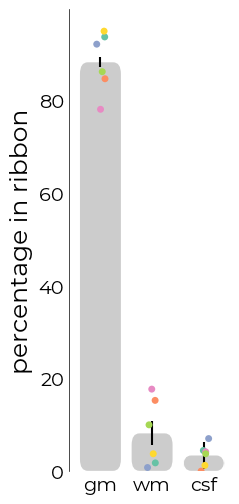

In [32]:
%matplotlib inline
fig,axs = plt.subplots(figsize=(2,6))
bar_plot = plotting.LazyBar(
    data=im3e.df_cont,
    x="tissue",
    y="percentage",
    axs=axs,
    add_labels=True,
    y_label2="percentage in ribbon",
    sns_ori="v",
    fancy=True,
    fancy_denom=6,
    hue=None,
    points_hue="subject",
    points_cmap=im3e.sub_colors,   
    color="#cccccc",
    add_points=True,
    # points_color="k",
    # points_alpha=0.4,
    sns_offset=4
)

fname = opj(fig_dir, f"sub-all_model-{model}_fig-s5_desc-contamination")
for ext in ["png","svg"]:

    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )

In [33]:
im3e.df_cont.groupby(["run","tissue"]).mean()

percentage  code
run tissue                  
1   csf       3.443700   2.0
    gm       88.339120   0.0
    wm        8.217179   1.0

In [16]:
bar_plot.sem

array([1.07733439, 2.77006097, 3.17746417])

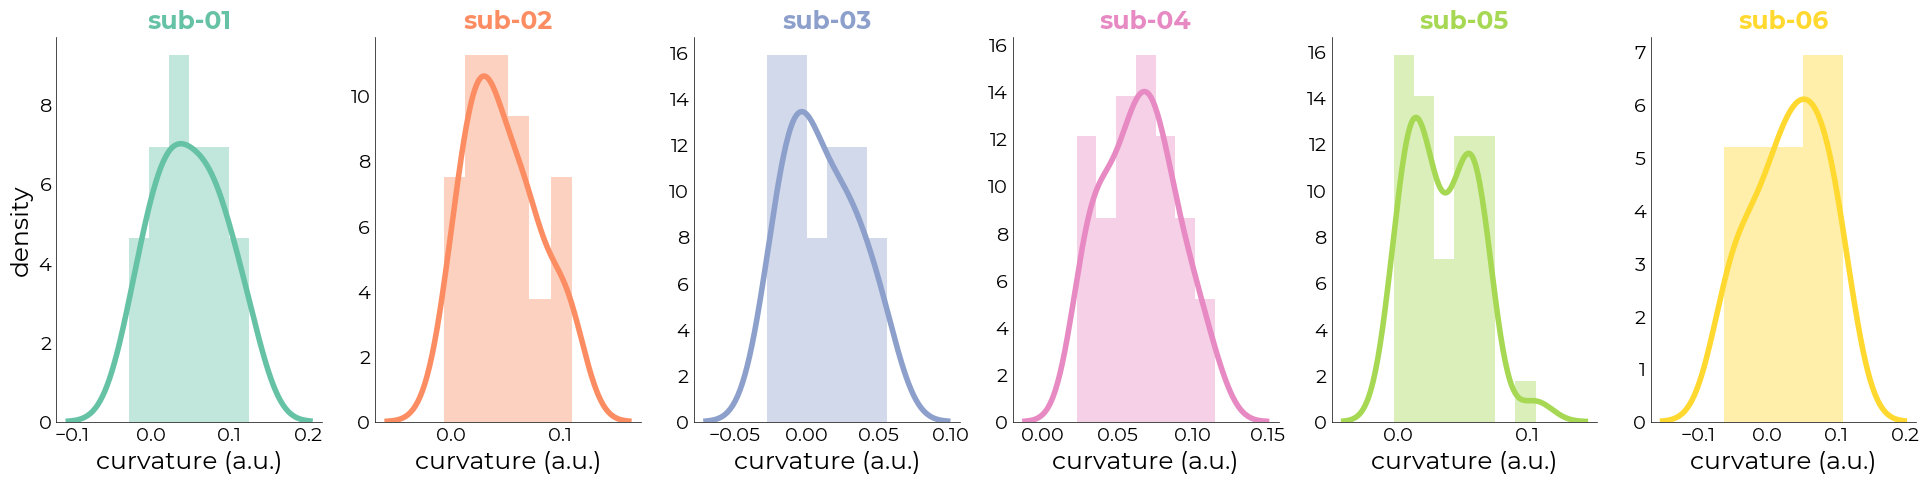

In [17]:
im3e.plot_curvature_distributions()

In [36]:
im3e.df_curv.mean()

curvature    0.043426
dtype: float64

In [39]:
from scipy.stats import sem
sem(im3e.df_curv.curvature.values)

0.0029300143076705356